In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
plt.style.use('bmh')

In [2]:
df = pd.read_csv('MNIST-10k.csv', sep=';', decimal=',')
df['time'] = 1 / df['time']
df

,Device,Framework,time
0,i3-7100 + Intel HD 620 *,Hallgerd,0.033333
1,i3-7100 + Intel HD 620 *,PyTorch,0.028571
2,FX4350 + GTX660 *,Hallgerd,0.055866
3,FX4350 + GTX660 *,PyTorch,0.027778
4,Tesla K20Xm,Hallgerd,0.090909
5,Tesla K20Xm,PyTorch,0.166667
6,Tesla T4,Hallgerd,0.147059
7,Tesla T4,PyTorch,0.273973


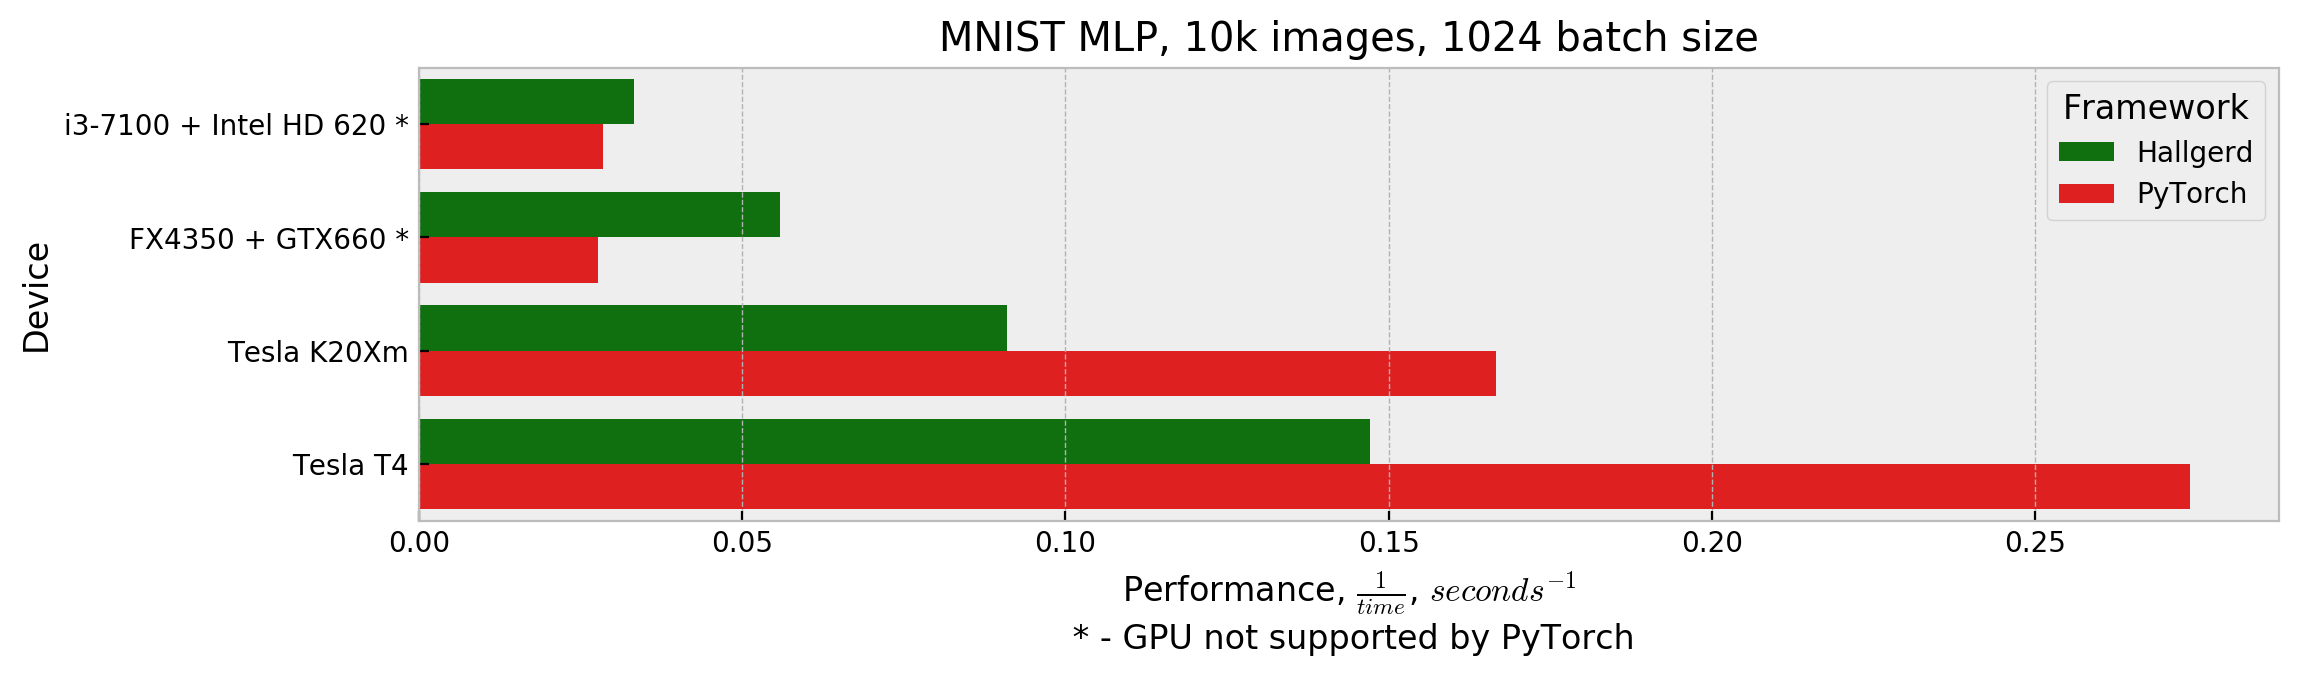

In [3]:
plt.figure(figsize=(12,3), dpi=200)
plt.title('MNIST MLP, 10k images, 1024 batch size')
sns.barplot(data=df, x='time', y='Device', hue='Framework', hue_order=['Hallgerd', 'PyTorch'], palette=['g', 'r'])
plt.xlabel(r'Performance, $\frac{1}{time}$, $seconds^{-1}$' + '\n * - GPU not supported by PyTorch')
plt.show()

In [4]:
df = pd.read_csv('mmulFLOPS.csv', sep=';', decimal=',')
df

,Device,Framework,GFLOPS
0,i3-7100 + Intel HD 620 *,NumPy,55.869
1,i3-7100 + Intel HD 620 *,PyTorch,57.266
2,i3-7100 + Intel HD 620 *,Gunnar,49.790
3,FX4350 + GTX660 *,NumPy,44.910
4,FX4350 + GTX660 *,PyTorch,37.150
5,FX4350 + GTX660 *,Gunnar,214.750
6,Tesla K20Xm,NumPy,50.000
7,Tesla K20Xm,PyTorch,858.990
8,Tesla K20Xm,Gunnar,270.540
9,Tesla K80 **,NumPy,50.000


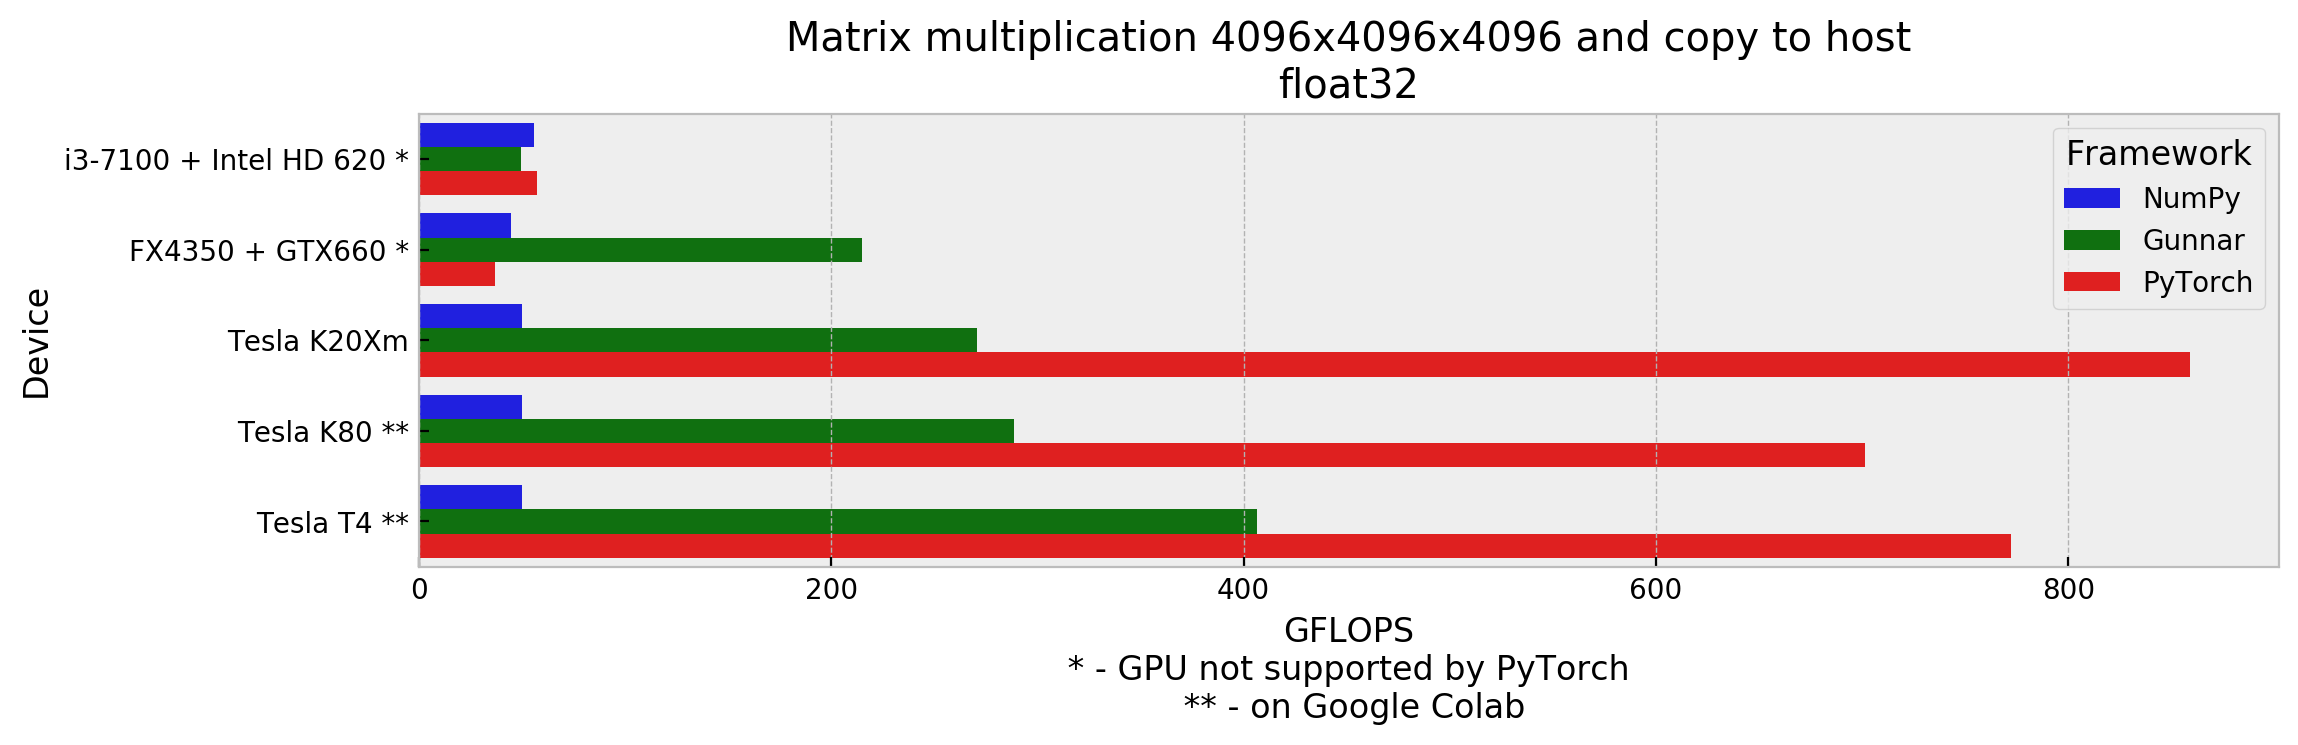

In [9]:
plt.figure(figsize=(12,3), dpi=200)
plt.title('Matrix multiplication 4096x4096x4096 and copy to host\nfloat32')
sns.barplot(data=df, x='GFLOPS', y='Device', hue='Framework', hue_order=['NumPy', 'Gunnar', 'PyTorch'], palette=['b', 'g', 'r'])
plt.xlabel(r'GFLOPS' + '\n * - GPU not supported by PyTorch \n ** - on Google Colab')
# plt.xscale('log')
plt.show()

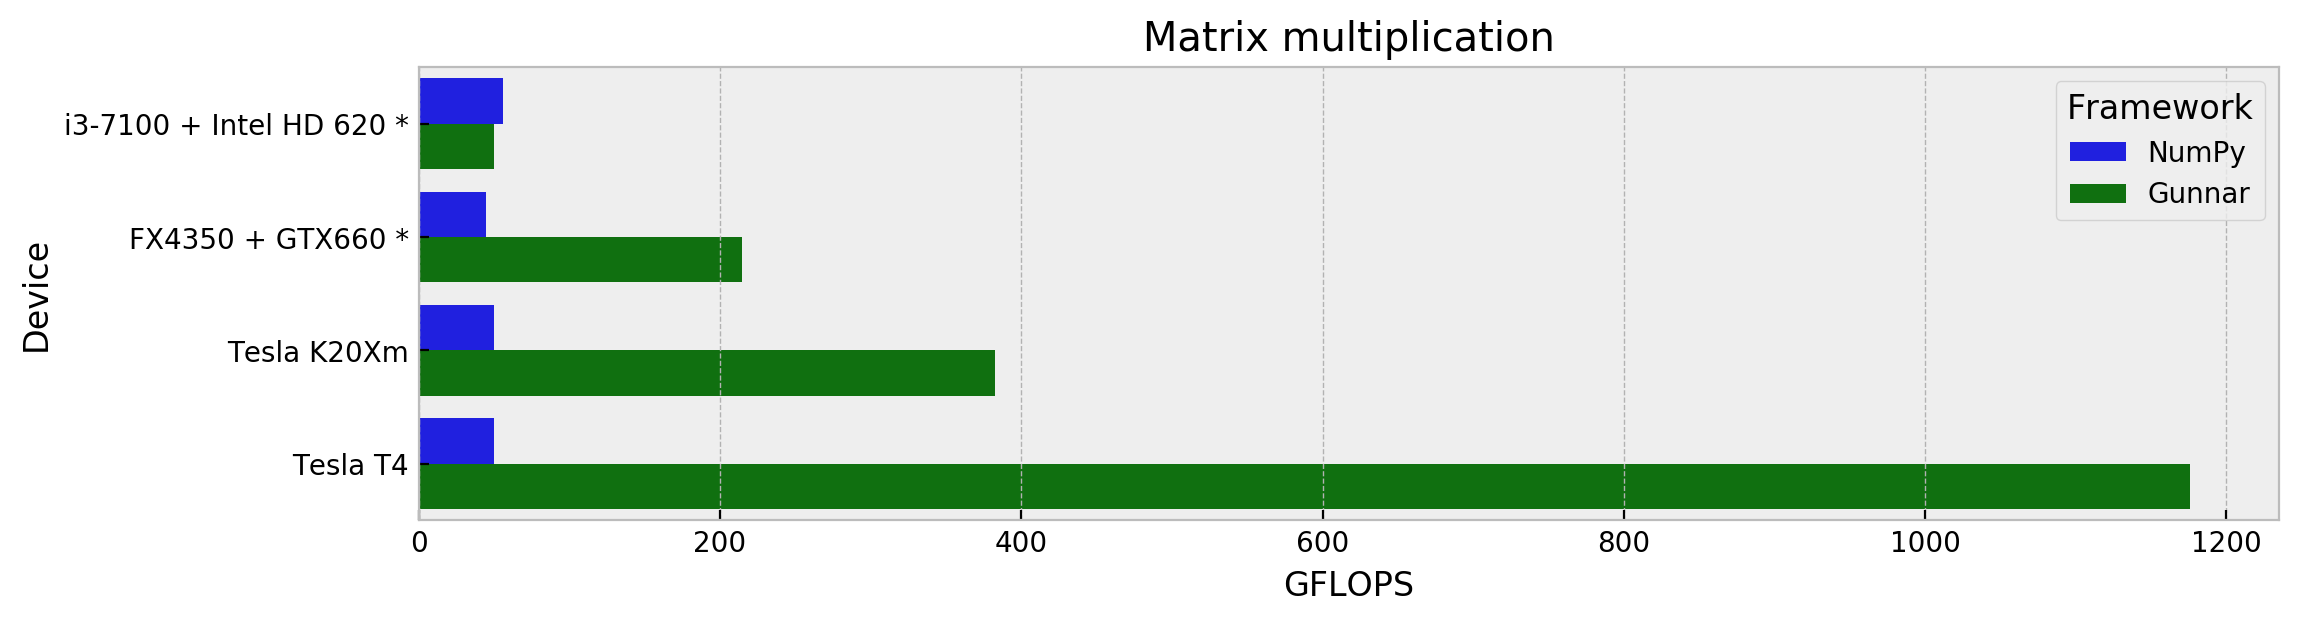

In [24]:
df = df[df.Framework != 'PyTorch']
plt.figure(figsize=(12,3), dpi=200)
plt.title('Matrix multiplication')
sns.barplot(data=df, x='GFLOPS', y='Device', hue='Framework', palette=['b', 'g'])
plt.xlabel(r'GFLOPS')
plt.show()